# Import and setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# laod data
df = pd.read_csv('../data/derived/combined_data_by_incident.csv', index_col=0)

In [3]:
df.columns

Index(['year', 'country_id', 'country_txt_wb', 'country_txt_gtd',
       'country_code', 'region', 'region_txt', 'arrivals', 'population',
       'tourism_rank_2012', 'tourism_group', 'incident_id', 'nkill', 'nkillus',
       'nkillte', 'nwound', 'nwoundus', 'nwoundte', 'nvictim', 'nvictimus',
       'nvictimte', 'event_ct_total'],
      dtype='object')

In [4]:
# select columns for visualization
df = df[['year', 'country_id', 'country_txt_wb', 'country_txt_gtd', 'tourism_group', 'nvictim', 'nkill', 'nwound']]

In [5]:
# examine dataframe
df.head()

,year,country_id,country_txt_wb,country_txt_gtd,tourism_group,nvictim,nkill,nwound
0,2012,92,India,India,NaN,8.0,2.0,6.0
1,2012,123,Mali,Mali,low,36.0,36.0,0.0
2,2012,123,Mali,Mali,low,11.0,11.0,0.0
3,2012,603,United Kingdom,United Kingdom,high,0.0,0.0,0.0
4,2012,92,India,India,NaN,13.0,13.0,0.0


# Data exploration

Before I create the plot we mocked up, I want to get an idea for the distribution of incidents, populations, and incidents per capita for all countries and all years.

In [6]:
# define columns of interest
columns_of_interest = ['nvictim', 'nkill', 'nwound']

In [7]:
# describe columns of interest
df[columns_of_interest].describe()

,nvictim,nkill,nwound
count,16995.000000,16995.000000,16995.000000
mean,2.916093,1.018594,1.897499
std,13.804926,5.757231,10.643692
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,2.000000,1.000000,1.000000
max,520.000000,311.000000,433.000000


All variables have 16995 values, representing 16995 incidents.

All variables follow a similar right-skewed distribution pattern of having mostly 0's with some high outliers.

The number of victims ranges from 0 to 520. Most values are 0. The median is 1, the mean is 2.916, and the standard deviation is 13.804. The distribution has many low numbers (thankfully) with a few high numbers - it is right skewed.

The number of victims ranges from 0 to 311. Most values are 0. The median is 0, the mean is 1.018, and the standard deviation is 5.757. The distribution has many low numbers (thankfully) with a few high numbers - it is right skewed.

The number of wounded ranges from 0 to 433. Most values are 0. The median is 0, the mean is 1.897, and the standard deviation is 10.643. The distribution has many low numbers (thankfully) with a few high numbers - it is right skewed.

In [8]:
def plot_histogram(column_name):
    plt.hist(df[column_name], bins=30, label=column_name)
    plt.xlabel(column_name)
    plt.ylabel('frequency')
    plt.show()

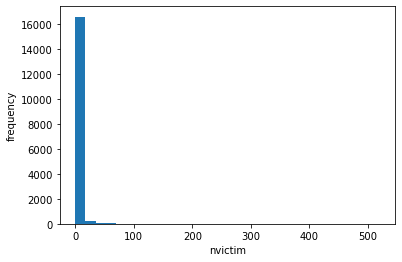

In [9]:
plot_histogram('nvictim')

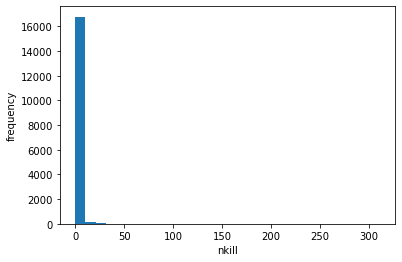

In [10]:
plot_histogram('nkill')

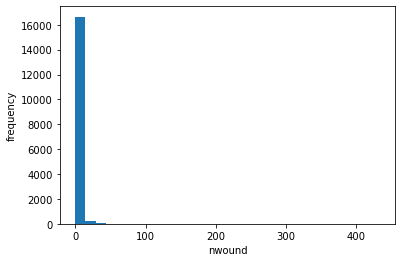

In [11]:
plot_histogram('nwound')

I see the right skew I expected in each of these variables. So many zero values!

# Orginal mockup: violin plot with matplotlib

In [12]:
def plot_violin_plot(column_of_interest):
    
    # find slices for all countries, and countries with high and low tourism
    all_x = df[column_of_interest]
    high_x = df[df['tourism_group']=='high'][column_of_interest]
    low_x = df[df['tourism_group']=='low'][column_of_interest]
    
    # create figure
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,5))
    fig.subplots_adjust(wspace=.05, hspace=0)
    
    # add title
    if column_of_interest == 'nvictim':
        plot_title = 'Number of Victims per Incident'
    elif column_of_interest == 'nkill':
        plot_title = 'Number of Fatalities per Incident'
    elif column_of_interest == 'nwound':
        plot_title = 'Number of Non-Fatal Wounded per Incident'
    else:
        plot_title = column_of_interest
    fig.suptitle(plot_title, fontsize=12, fontweight ="bold")

    # create violin plots
    ax1.violinplot(all_x)
    ax2.violinplot(high_x)
    ax3.violinplot(low_x)

    # add subplot titles
    ax1.set_title('All')
    ax2.set_title('High Tourism')
    ax3.set_title('Low Tourism')

    # remove x-axis
    for ax in [ax1, ax2, ax3]: ax.xaxis.set_visible(False)

    # add y-axis label
    ax1.set_ylabel('Count')

    # show plot
    plt.show()

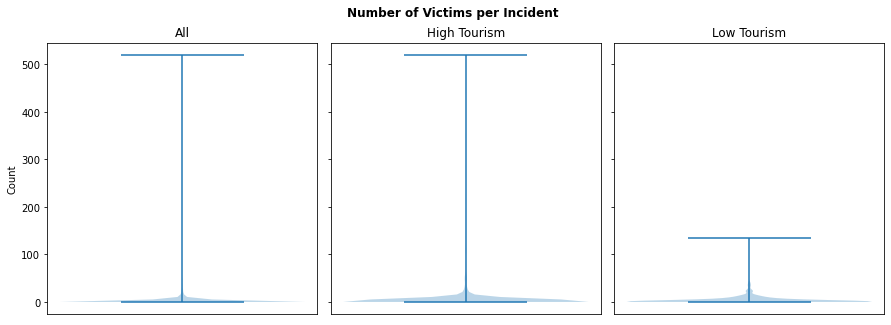

In [13]:
plot_violin_plot('nvictim')

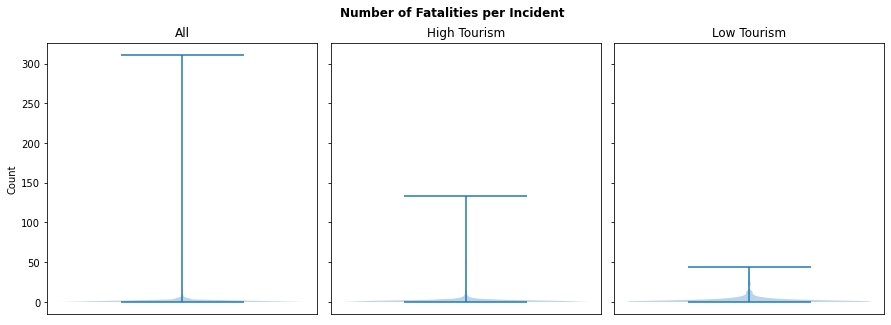

In [14]:
plot_violin_plot('nkill')

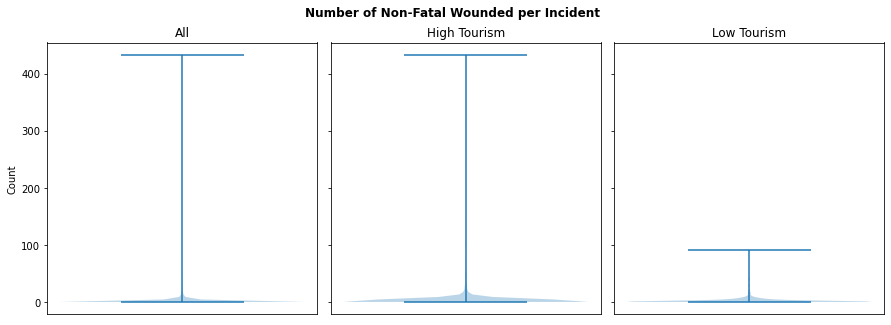

In [15]:
plot_violin_plot('nwound')

This is interesting! It looks like there is relationship between the violence of an incident and the tourism group of the country. Countries with higher tourism have a higher number of victims, fatalities, and non-fatal wounded than countries with lower tourism.

# New idea: strip plot with seaborn

I think it would be better to see the data points directly, so I am going to switch from a continuous encoding to a discrete encoding - from a density plot to a strip plot. Matplotlib doesn't have a function for a strip plot, but seaborn does, so I'm switching my plotting library as well.

In [16]:
def plot_strip_plot(column_of_interest):
    
    # find slices for all countries, and countries with high and low tourism
    all_df  = df
    high_df = df[df['tourism_group']=='high']
    low_df  = df[df['tourism_group']=='low']
    
    # find sample sizes
    all_df_n, high_df_n, low_df_n = ['n = ' + str(len(i)) for i in [all_df, high_df, low_df]]    
    
    # set style
    sns.set_style('whitegrid')
    
    # create figure
    fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,5))
    fig.subplots_adjust(wspace=.05, hspace=0)

    # create violin plots
    sns.stripplot(y=column_of_interest, data=all_df,  ax=axs[0])
    sns.stripplot(y=column_of_interest, data=high_df, ax=axs[1])
    sns.stripplot(y=column_of_interest, data=low_df,  ax=axs[2])

    # add title
    if column_of_interest == 'nvictim':
        plot_title = 'Number of Victims per Incident'
    elif column_of_interest == 'nkill':
        plot_title = 'Number of Fatalities per Incident'
    elif column_of_interest == 'nwound':
        plot_title = 'Number of Non-Fatal Wounded per Incident'
    else:
        plot_title = column_of_interest
    fig.suptitle(plot_title, fontsize=12, fontweight ="bold")
    
    # add subplot titles
    axs[0].set(ylabel='Count', xlabel = all_df_n,  title='All')
    axs[1].set(ylabel=None,    xlabel = high_df_n, title='High Tourism')
    axs[2].set(ylabel=None,    xlabel = low_df_n,  title='Low Tourism')

    # show plot
    plt.show()

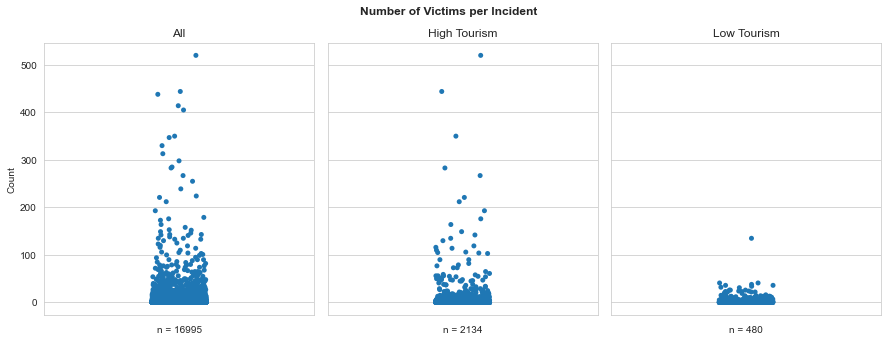

In [17]:
plot_strip_plot('nvictim')

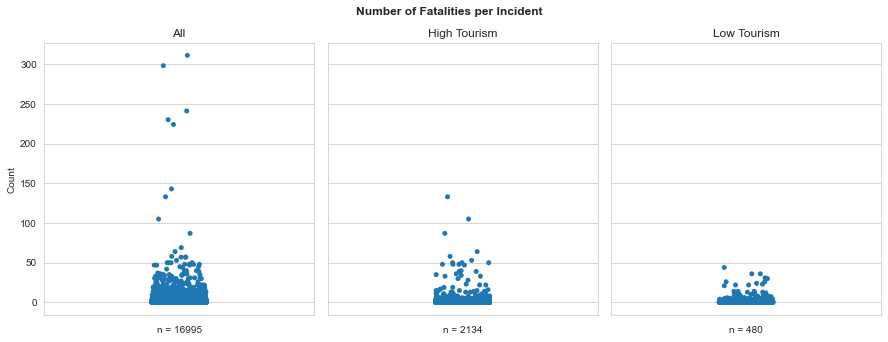

In [18]:
plot_strip_plot('nkill')

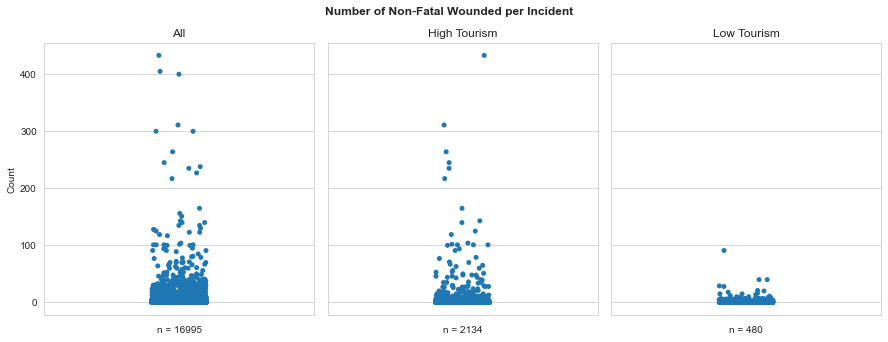

In [19]:
plot_strip_plot('nwound')

These plots also show that countries with higher tourism have a higher number of victims, fatalities, and non-fatal wounded than countries with lower tourism. But now, it's easier to see that most values are at 0, and outliers are driving that difference. Also, the sample sizes indicate that high tourism countries had more incidents than low tourism countries for the 7 years of data we are looking at.

### Strip plot by tourism group and year

In [20]:
def plot_strip_plot_by_year(column_of_interest):
    
    # find slices for all countries, and countries with high and low tourism
    all_df  = df
    high_df = df[df['tourism_group']=='high']
    low_df  = df[df['tourism_group']=='low']
    
    # find sample sizes
    all_df_n, high_df_n, low_df_n = ['n = ' + str(len(i)) for i in [all_df, high_df, low_df]]    
    
    # set style
    sns.set_style('whitegrid')
    
    # create figure
    fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,5))
    fig.subplots_adjust(wspace=.05, hspace=0)

    # create violin plots
    sns.stripplot(y=column_of_interest, x='year', data=all_df,  ax=axs[0])
    sns.stripplot(y=column_of_interest, x='year', data=high_df, ax=axs[1])
    sns.stripplot(y=column_of_interest, x='year', data=low_df,  ax=axs[2])

    # add title
    if column_of_interest == 'nvictim':
        plot_title = 'Number of Victims per Incident'
    elif column_of_interest == 'nkill':
        plot_title = 'Number of Fatalities per Incident'
    elif column_of_interest == 'nwound':
        plot_title = 'Number of Non-Fatal Wounded per Incident'
    else:
        plot_title = column_of_interest
    fig.suptitle(plot_title, fontsize=12, fontweight ="bold")
    
    # add subplot titles
    axs[0].set(ylabel='Count', xlabel = all_df_n,  title='All')
    axs[1].set(ylabel=None,    xlabel = high_df_n, title='High Tourism')
    axs[2].set(ylabel=None,    xlabel = low_df_n,  title='Low Tourism')

    # show plot
    plt.show()

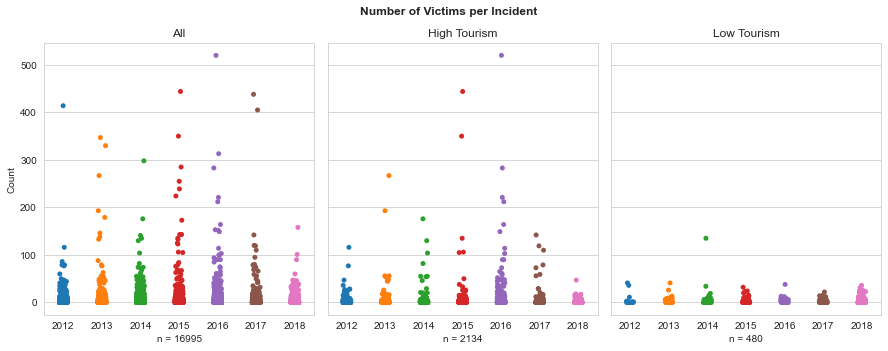

In [21]:
plot_strip_plot_by_year('nvictim')

I think this plot above is somewhat striking - look at the data points with over 100 victims across each group. High tourism countries have 10s of incidents with >100 victims, low tourism countries have just 1.

In [22]:
# find slices for all countries, and countries with high and low tourism
all_df  = df
high_df = df[df['tourism_group']=='high']
low_df  = df[df['tourism_group']=='low']

In [23]:
# find number of incidents with >100 victims
print(f'In all countries, there are {sum(all_df.nvictim>100)} incidents with over 100 victims.')
print(f'In high tourism countries, there are {sum(high_df.nvictim>100)} incidents with over 100 victims.')
print(f'In low tourism countries, there are {sum(low_df.nvictim>100)} incidents with over 100 victims.')

In all countries, there are 50 incidents with over 100 victims.
In high tourism countries, there are 22 incidents with over 100 victims.
In low tourism countries, there are 1 incidents with over 100 victims.


In [24]:
# find number of incidents with >50 victims
print(f'In all countries, there are {sum(all_df.nvictim>50)} incidents with over 50 victims.')
print(f'In high tourism countries, there are {sum(high_df.nvictim>50)} incidents with over 50 victims.')
print(f'In low tourism countries, there are {sum(low_df.nvictim>50)} incidents with over 50 victims.')

In all countries, there are 110 incidents with over 50 victims.
In high tourism countries, there are 41 incidents with over 50 victims.
In low tourism countries, there are 1 incidents with over 50 victims.


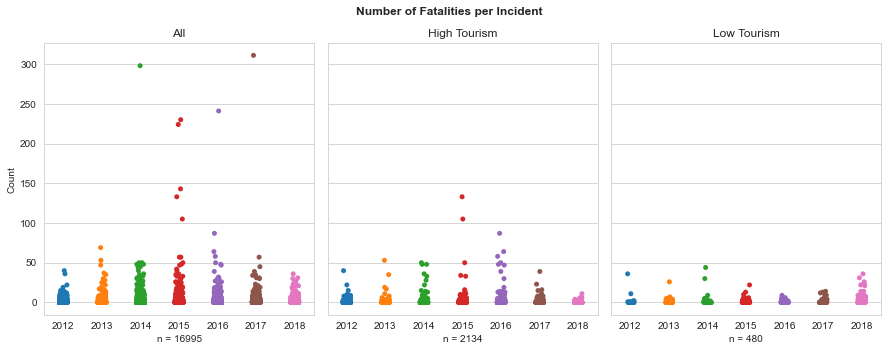

In [25]:
plot_strip_plot_by_year('nkill')

In [26]:
# find number of incidents with >100 fatalities
print(f'In all countries, there are {sum(all_df.nkill>100)} incidents with over 100 fatalities.')
print(f'In high tourism countries, there are {sum(high_df.nkill>100)} incidents with over 100 fatalities.')
print(f'In low tourism countries, there are {sum(low_df.nkill>100)} incidents with over 100 fatalities.')

In all countries, there are 8 incidents with over 100 fatalities.
In high tourism countries, there are 2 incidents with over 100 fatalities.
In low tourism countries, there are 0 incidents with over 100 fatalities.


In [27]:
# find number of incidents with >50 fatalities
print(f'In all countries, there are {sum(all_df.nkill>50)} incidents with over 50 fatalities.')
print(f'In high tourism countries, there are {sum(high_df.nkill>50)} incidents with over 50 fatalities.')
print(f'In low tourism countries, there are {sum(low_df.nkill>50)} incidents with over 50 fatalities.')

In all countries, there are 16 incidents with over 50 fatalities.
In high tourism countries, there are 6 incidents with over 50 fatalities.
In low tourism countries, there are 0 incidents with over 50 fatalities.


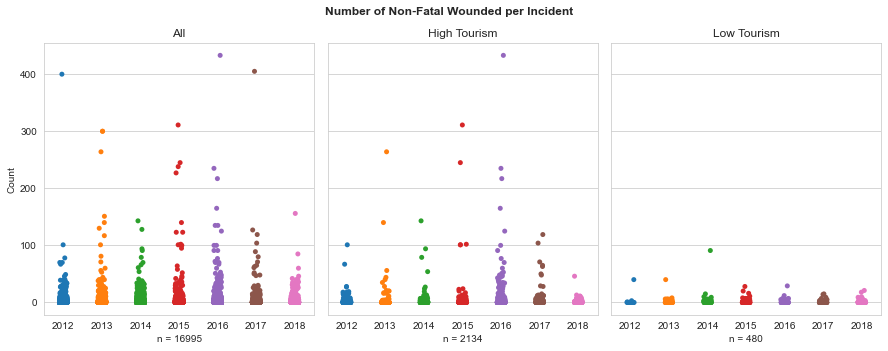

In [28]:
plot_strip_plot_by_year('nwound')

In [29]:
# find number of incidents with >100 non-fatal wounded
print(f'In all countries, there are {sum(all_df.nwound>100)} incidents with over 100 non-fatal wounded.')
print(f'In high tourism countries, there are {sum(high_df.nwound>100)} incidents with over 100 non-fatal wounded.')
print(f'In low tourism countries, there are {sum(low_df.nwound>100)} incidents with over 100 non-fatal wounded.')

In all countries, there are 34 incidents with over 100 non-fatal wounded.
In high tourism countries, there are 16 incidents with over 100 non-fatal wounded.
In low tourism countries, there are 0 incidents with over 100 non-fatal wounded.


In [30]:
# find number of incidents with >50 non-fatal wounded
print(f'In all countries, there are {sum(all_df.nwound>50)} incidents with over 50 non-fatal wounded.')
print(f'In high tourism countries, there are {sum(high_df.nwound>50)} incidents with over 50 non-fatal wounded.')
print(f'In low tourism countries, there are {sum(low_df.nwound>50)} incidents with over 50 non-fatal wounded.')

In all countries, there are 76 incidents with over 50 non-fatal wounded.
In high tourism countries, there are 31 incidents with over 50 non-fatal wounded.
In low tourism countries, there are 1 incidents with over 50 non-fatal wounded.


Although I think these plots need some work (the playful color scheme feels particularly inappropriate given the seriousness of the data...) these plots do show a difference between high and low tourism countries.

**Key takeaway:** High tourism countries have more incidents and incidents with more victims, fatalities, and non-fatal wounded than low tourism countries.